In [1]:
import os
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from rdflib import Graph, URIRef, Literal

data_dir = os.getcwd()
data_dir = os.path.dirname(os.path.dirname(data_dir))
data_dir_folder = os.path.join(data_dir, "Data Directory")
data_dir_csv = os.path.join(data_dir, "Data Directory", "physics_and_chemistry_nobel_laureate.csv")

# Load the spacy model
nlp = spacy.load('en_core_web_sm')

# Load Preprocessed Data
physics_and_chemistry_nobel_laureate = pd.read_csv(data_dir_csv)

print(physics_and_chemistry_nobel_laureate['clean_biography'])

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0      wilhelm conrad röntgen german pronunciation ˈv...
1      hendrik antoon lorentz july february dutch phy...
2      pieter zeeman dutch ˈzeːmɑn october dutch phys...
3      antoine henri becquerel french pronunciation b...
4      pierre curie kure ee french pjɛʁ kyʁi april fr...
                             ...                        
195    sir aaron klug august november british biophys...
196    henry taube november november canadian bear am...
197    robert bruce merrifield july american biochemi...
198    herbert aaron hauptman february october americ...
199    jerome karle bear jerome karfunkle june june a...
Name: clean_biography, Length: 200, dtype: object


## Text

Vocabulary: 50 most frequent words and word cloud for each category (Text)

Word Dictionary:  {'physics': 1200, 'university': 1189, 'work': 895, 'nobel': 691, 'theory': 662, 'prize': 610, 'year': 558, 'research': 538, 'new': 506, 'institute': 478, 'science': 477, 'einstein': 469, 'quantum': 450, 'bohr': 425, 'laboratory': 417, 'physicist': 408, 'nuclear': 394, 'professor': 393, 'time': 393, 'award': 388, 'american': 370, 'study': 360, 'later': 359, 'paper': 355, 'feynman': 345, 'war': 342, 'energy': 341, 'life': 337, 'receive': 330, 'isbn': 322, 'academy': 320, 'know': 318, 'include': 314, 'heisenberg': 310, 'society': 308, 'world': 307, 'particle': 306, 'publish': 303, 'ray': 298, 'lecture': 293, 'sciences': 289, 'field': 288, 'national': 288, 'atomic': 279, 'german': 278, 'bear': 274, 'scientific': 273, 'der': 273, 'discovery': 271, 'die': 271}


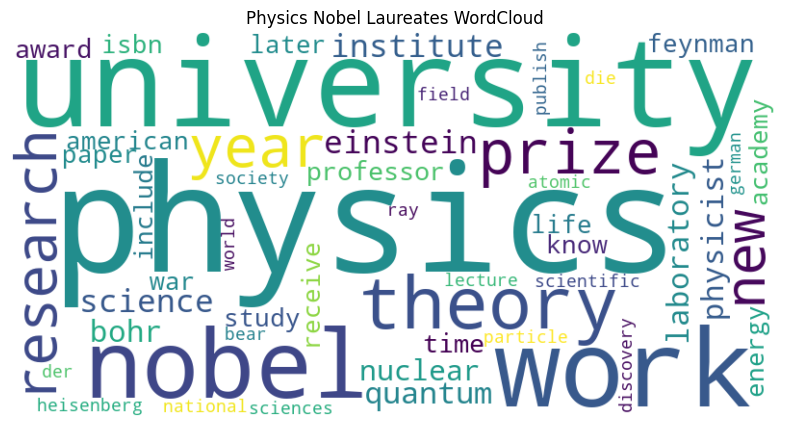

Word Dictionary:  {'chemistry': 858, 'university': 797, 'work': 731, 'nobel': 573, 'research': 532, 'prize': 442, 'chemical': 394, 'award': 370, 'year': 343, 'study': 341, 'science': 318, 'society': 308, 'new': 289, 'institute': 280, 'structure': 269, 'life': 268, 'professor': 262, 'laboratory': 236, 'academy': 236, 'time': 236, 'receive': 236, 'hahn': 236, 'member': 234, 'american': 234, 'war': 226, 'later': 224, 'include': 222, 'world': 221, 'german': 216, 'sciences': 208, 'school': 199, 'haber': 199, 'chemist': 198, 'scientific': 188, 'early': 186, 'publish': 182, 'national': 179, 'reaction': 171, 'medal': 170, 'know': 169, 'element': 168, 'royal': 167, 'develop': 166, 'bear': 165, 'lecture': 164, 'die': 155, 'atomic': 155, 'nuclear': 155, 'method': 153, 'name': 149}


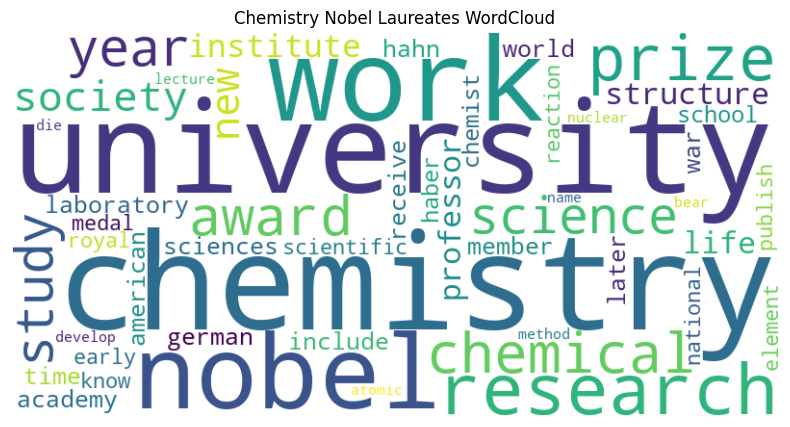

In [2]:

# Function to plot WordCloud
def plot_wordcloud(text, category):
    # Generate the 50 most frequent words in the laureates' biographies
    word_freq = Counter(text.split()).most_common(50)
    word_dict = dict(word_freq)
    print("Word Dictionary: ", word_dict)
    # Create a WordCloud object for the laureates 50 most frequent words
    wordcloud = WordCloud(width=800, height=400, background_color ='white').fit_words(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category} Nobel Laureates WordCloud')
    plt.show()

# Combine physics laureate biographies into a single string
physics_text = ' '.join(physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Physics']['clean_biography'].astype(str))

# Combine chemistry laureate biographies into a single string
chemistry_text = ' '.join(physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Chemistry']['clean_biography'].astype(str))


# Plot the WordCloud for the physics laureates
plot_wordcloud(physics_text, "Physics")

# Plot the WordCloud for the chemistry laureates
plot_wordcloud(chemistry_text, "Chemistry")


## Graphs

In [3]:
import os

# Fetch Corresponding Knowledge Graph json file for each laureate using their name
def retrieve_knowlege_graph(name_category):
    # Remove all white spaces from the name
    name = name_category['name'].replace(" ", "__")
    category = name_category['category'].lower()
    
    # Load the knowledge graph json file
    try:
        json = pd.read_json(os.path.join(data_dir_folder, f"{category}_nobel_laureate", f"{name}.json"))
        return json
    except Exception as e:
        print(f"File {name}.json not found", e)

# Retrieve the knowledge graph for each laureate
physics_and_chemistry_nobel_laureate['knowledge_graph'] = physics_and_chemistry_nobel_laureate[[ 'name', 'category']].apply(retrieve_knowlege_graph, axis=1)

RDF properties: 50 most frequent properties and property cloud for each category

predicates {'California_Institute_of_Technology': 109, 'Cambridge_University_Press': 107, 'Robert_S._Mulliken': 106, 'Rudolf_Peierls': 106, 'Rosalind_Franklin': 105, 'Carl_Sagan': 104, 'Carnegie_Mellon_University': 103, 'Carl_Djerassi': 102, 'Calutron': 102, 'Rockefeller_University': 102, 'Californium': 102, 'Carl_Friedrich_von_Weizsäcker': 102, 'Carl_Ludwig_Siegel': 101, 'Case_Western_Reserve_University': 101, 'Quebec_Agreement': 101, 'List_of_University_of_California,_Berkeley_alumni': 101, 'List_of_University_of_California,_Berkeley_faculty': 101, 'Royal_Institution': 101, 'Electron_configuration': 101, 'Pyotr_Kapitsa': 101, 'Royal_Society_Bakerian_Medal': 101, 'Caesium': 101, 'List_of_University_of_California,_San_Diego_people': 100, 'List_of_female_nominators_for_the_Nobel_Prize': 100, 'List_of_Harvard_University_people': 100, 'Presidency_College,_Chennai': 100, 'List_of_fellows_of_the_Royal_Society_S,_T,_U,_V': 100, 'Cambridge_Antibody_Technology': 100, 'List_of_University_of_Abe

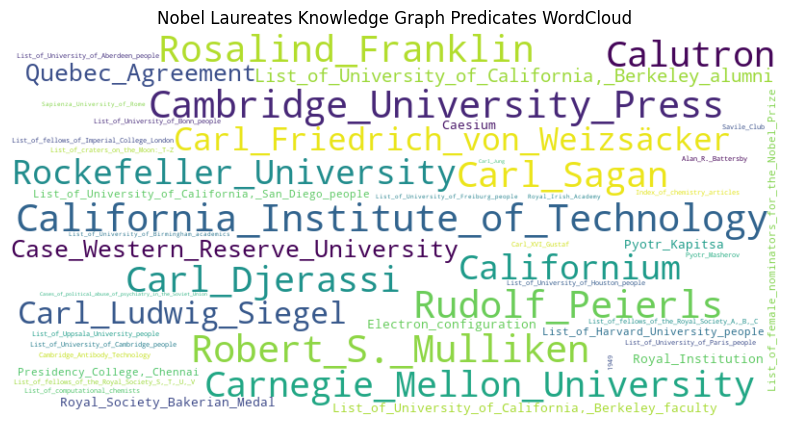

In [4]:
# Concat all knowledge_graph columns into a single dataframe
knowledge_graph = pd.concat(physics_and_chemistry_nobel_laureate['knowledge_graph'].tolist(), ignore_index=True)

# Set column values to [ColumnName]['value']
knowledge_graph['subject'] = knowledge_graph['subject'].apply(lambda x: x['value'])
knowledge_graph['predicate'] = knowledge_graph['predicate'].apply(lambda x: x['value'])
knowledge_graph['object'] = knowledge_graph['object'].apply(lambda x: x['value'])

knowledge_graph.head()

g = Graph()

# Fetch names of all physics and chemistry laureates
physics_nobel_laureate = [ Literal(file.split('.')[0].replace("__", "_")) for file in os.listdir(os.path.join(data_dir_folder, "physics_nobel_laureate")) if file.endswith(".json")]
chemistry_nobel_laureate = [ Literal(file.split('.')[0].replace("__", "_")) for file in os.listdir(os.path.join(data_dir_folder, "chemistry_nobel_laureate")) if file.endswith(".json")]

def plot_predicate_cloud(predicates):
    # Create a WordCloud object for the predicates
    wordcloud = WordCloud(width=800, height=400, background_color ='white').fit_words(predicates)
    # Plot the WordCloud for the predicates
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nobel Laureates Knowledge Graph Predicates WordCloud')
    plt.show()


# Convert Knowledge Graph columns to RDF triples
for index, row in knowledge_graph.iterrows():
    g.add((URIRef(row['subject']), URIRef(row['predicate']), URIRef(row['object'])))


# List of values to exclude
nobel_laureate = physics_nobel_laureate + chemistry_nobel_laureate

# SPARQL query to fetch all subjects and objects from the knowledge graph as literals
query = """
SELECT ?subjectLocalName ?objectLocalName
WHERE {
  ?subject ?predicate ?object .
  BIND(STRAFTER(STR(?subject), "http://dbpedia.org/resource/") AS ?subjectLocalName)
  BIND(IF(isURI(?object), STRAFTER(STR(?object), "http://dbpedia.org/resource/"), STR(?object)) AS ?objectLocalName)
}
"""

# Execute the query
results = g.query(query)
results_list = []
# Print the results
for row in results:
    results_list.append(str(row.subjectLocalName))
    results_list.append(str(row.objectLocalName))

# Remove all values that are names of nobel_laureates from the results_list
results_list = [item for item in results_list if item not in nobel_laureate]

predicates = Counter(results_list).most_common(50)
predicates = dict(predicates)
print("predicates", predicates)

# Plot the WordCloud for the predicates
plot_predicate_cloud(predicates)



Facts: Min/max/avg number of facts per category together. Histograms and box plots for number of facts per graph for each category

Physics laureates knowledge graph length with Min 0
Physics laureates knowledge graph length with Max 100
Physics laureates knowledge graph length with Average 98.01
Chemistry laureates knowledge graph length with Min 1
Chemistry laureates knowledge graph length with Max 100
Chemistry laureates knowledge graph length with Average 98.06


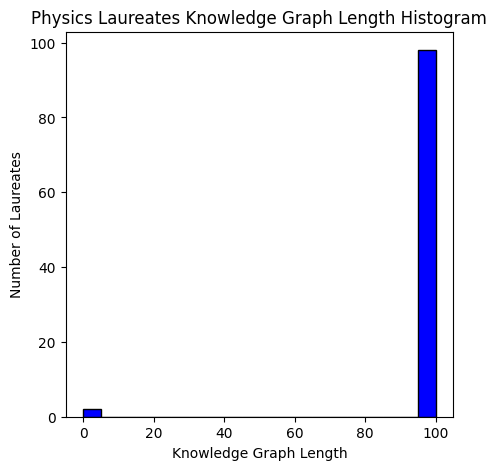

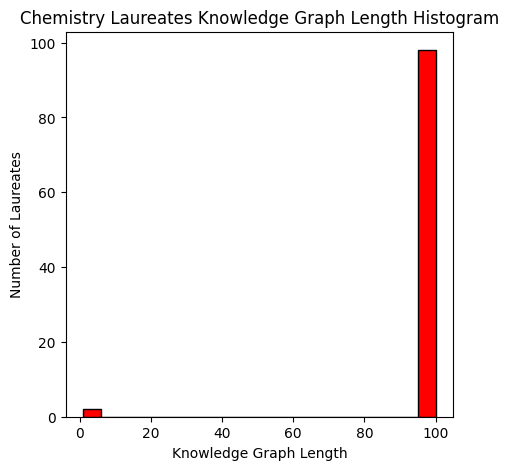

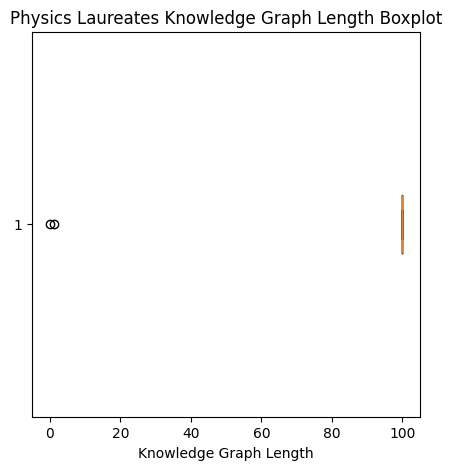

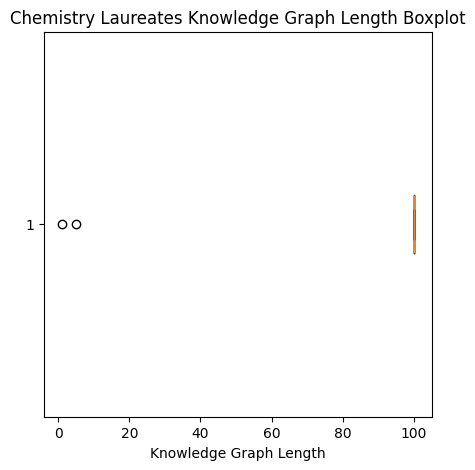

In [5]:
# Add a column to the dataframe with the length of the knowledge graph
physics_and_chemistry_nobel_laureate['knowledge_graph_length'] = physics_and_chemistry_nobel_laureate['knowledge_graph'].apply(lambda x: len(x) if x is not None else 0)

# Fetch the knowledge graph length for physics laureates
physics_knowledge_graph_length = physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Physics']['knowledge_graph_length']

# Get min, max and average knowledge graph length for physics laureates
print(f"Physics laureates knowledge graph length with Min {min(physics_knowledge_graph_length)}")
print(f"Physics laureates knowledge graph length with Max {max(physics_knowledge_graph_length)}")
print(f"Physics laureates knowledge graph length with Average {sum(physics_knowledge_graph_length)/len(physics_knowledge_graph_length)}")


# Fetch the knowledge graph length for chemistry laureates
chemistry_knowledge_graph_length = physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Chemistry']['knowledge_graph_length']

# Get min, max and average knowledge graph length for chemistry laureates
print(f"Chemistry laureates knowledge graph length with Min {min(chemistry_knowledge_graph_length)}")
print(f"Chemistry laureates knowledge graph length with Max {max(chemistry_knowledge_graph_length)}")
print(f"Chemistry laureates knowledge graph length with Average {sum(chemistry_knowledge_graph_length)/len(chemistry_knowledge_graph_length)}")

# Plot the histogram for the knowledge graph length of physics laureates
plt.figure(figsize=(5, 5))
plt.hist(physics_knowledge_graph_length, bins=20, color='blue', edgecolor='black')
plt.title('Physics Laureates Knowledge Graph Length Histogram')
plt.xlabel('Knowledge Graph Length')
plt.ylabel('Number of Laureates')
plt.show()

# Plot the histogram for the knowledge graph length of chemistry laureates
plt.figure(figsize=(5, 5))
plt.hist(chemistry_knowledge_graph_length, bins=20, color='red', edgecolor='black')
plt.title('Chemistry Laureates Knowledge Graph Length Histogram')
plt.xlabel('Knowledge Graph Length')
plt.ylabel('Number of Laureates')
plt.show()


# Plot boxplot for the knowledge graph length of physics laureates
plt.figure(figsize=(5, 5))
plt.boxplot(physics_knowledge_graph_length, vert=False)
plt.title('Physics Laureates Knowledge Graph Length Boxplot')
plt.xlabel('Knowledge Graph Length')
plt.show()

# Plot boxplot for the knowledge graph length of chemistry laureates
plt.figure(figsize=(5, 5))
plt.boxplot(chemistry_knowledge_graph_length, vert=False)
plt.title('Chemistry Laureates Knowledge Graph Length Boxplot')
plt.xlabel('Knowledge Graph Length')
plt.show()
